In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [305]:
abalone_train = pd.read_csv('abalone_train.csv')
abalone_test = pd.read_csv('abalone_test.csv')

**Data Information and Description:**

In [246]:
abalone_train.head()

,Id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,3141,I,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100,5
1,3521,I,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,3
2,883,M,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,15
3,3627,M,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305,10
4,2106,M,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650,14


In [247]:
abalone_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3341 entries, 0 to 3340
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              3341 non-null   int64  
 1   Sex             3341 non-null   object 
 2   Length          3341 non-null   float64
 3   Diameter        3341 non-null   float64
 4   Height          3341 non-null   float64
 5   Whole_weight    3341 non-null   float64
 6   Shucked_weight  3341 non-null   float64
 7   Viscera_weight  3341 non-null   float64
 8   Shell_weight    3341 non-null   float64
 9   Rings           3341 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 261.1+ KB


In [248]:
abalone_train.describe()

,Id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000
mean,2085.442083,0.525887,0.409463,0.140129,0.838176,0.363600,0.182507,0.241385,9.958396
std,1197.721846,0.119759,0.098895,0.042623,0.493789,0.224156,0.110439,0.139828,3.205591
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,1055.000000,0.450000,0.350000,0.115000,0.444500,0.188000,0.093500,0.132000,8.000000
50%,2086.000000,0.545000,0.425000,0.145000,0.810000,0.341500,0.172500,0.235000,10.000000
75%,3114.000000,0.620000,0.485000,0.165000,1.168500,0.509500,0.255500,0.330000,11.000000
max,4175.000000,0.815000,0.650000,1.130000,2.779500,1.488000,0.760000,1.005000,27.000000


In [249]:
abalone_train.skew()

Id                0.001225
Length           -0.635960
Diameter         -0.608490
Height            3.739177
Whole_weight      0.515061
Shucked_weight    0.717250
Viscera_weight    0.585675
Shell_weight      0.604484
Rings             1.112529
dtype: float64

**Checking Missing Values:**

In [250]:
abalone_train.isna().sum()

Id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

**Treating Outliers:**

<AxesSubplot:xlabel='Height'>

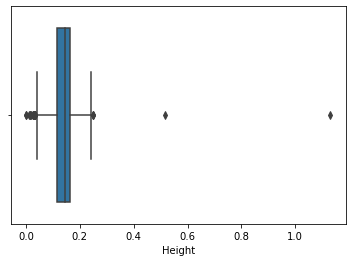

In [251]:
sns.boxplot(abalone_train['Height'])

In [252]:
def Outliers(abalone_train, var):
    Q1 = abalone_train['Height'].quantile(0.25)
    Q3 = abalone_train['Height'].quantile(0.75)
    IQR = Q3-Q1
    Lower = Q1-(1.5*IQR)
    Upper = Q3+(1.5*IQR)
    
    return Lower, Upper

In [253]:
lower_height, upper_height = Outliers(abalone_train, 'Height')

In [254]:
abalone_train['Height'] = np.where(abalone_train['Height'] > upper_height, upper_height, np.where(abalone_train['Height'] < 
                                                                                           lower_height, lower_height, abalone_train['Height']))

<AxesSubplot:xlabel='Height'>

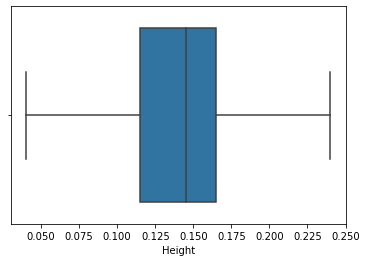

In [255]:
sns.boxplot(abalone_train['Height'])

In [256]:
abalone_train.dtypes

Id                  int64
Sex                object
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
Rings               int64
dtype: object

# EDA

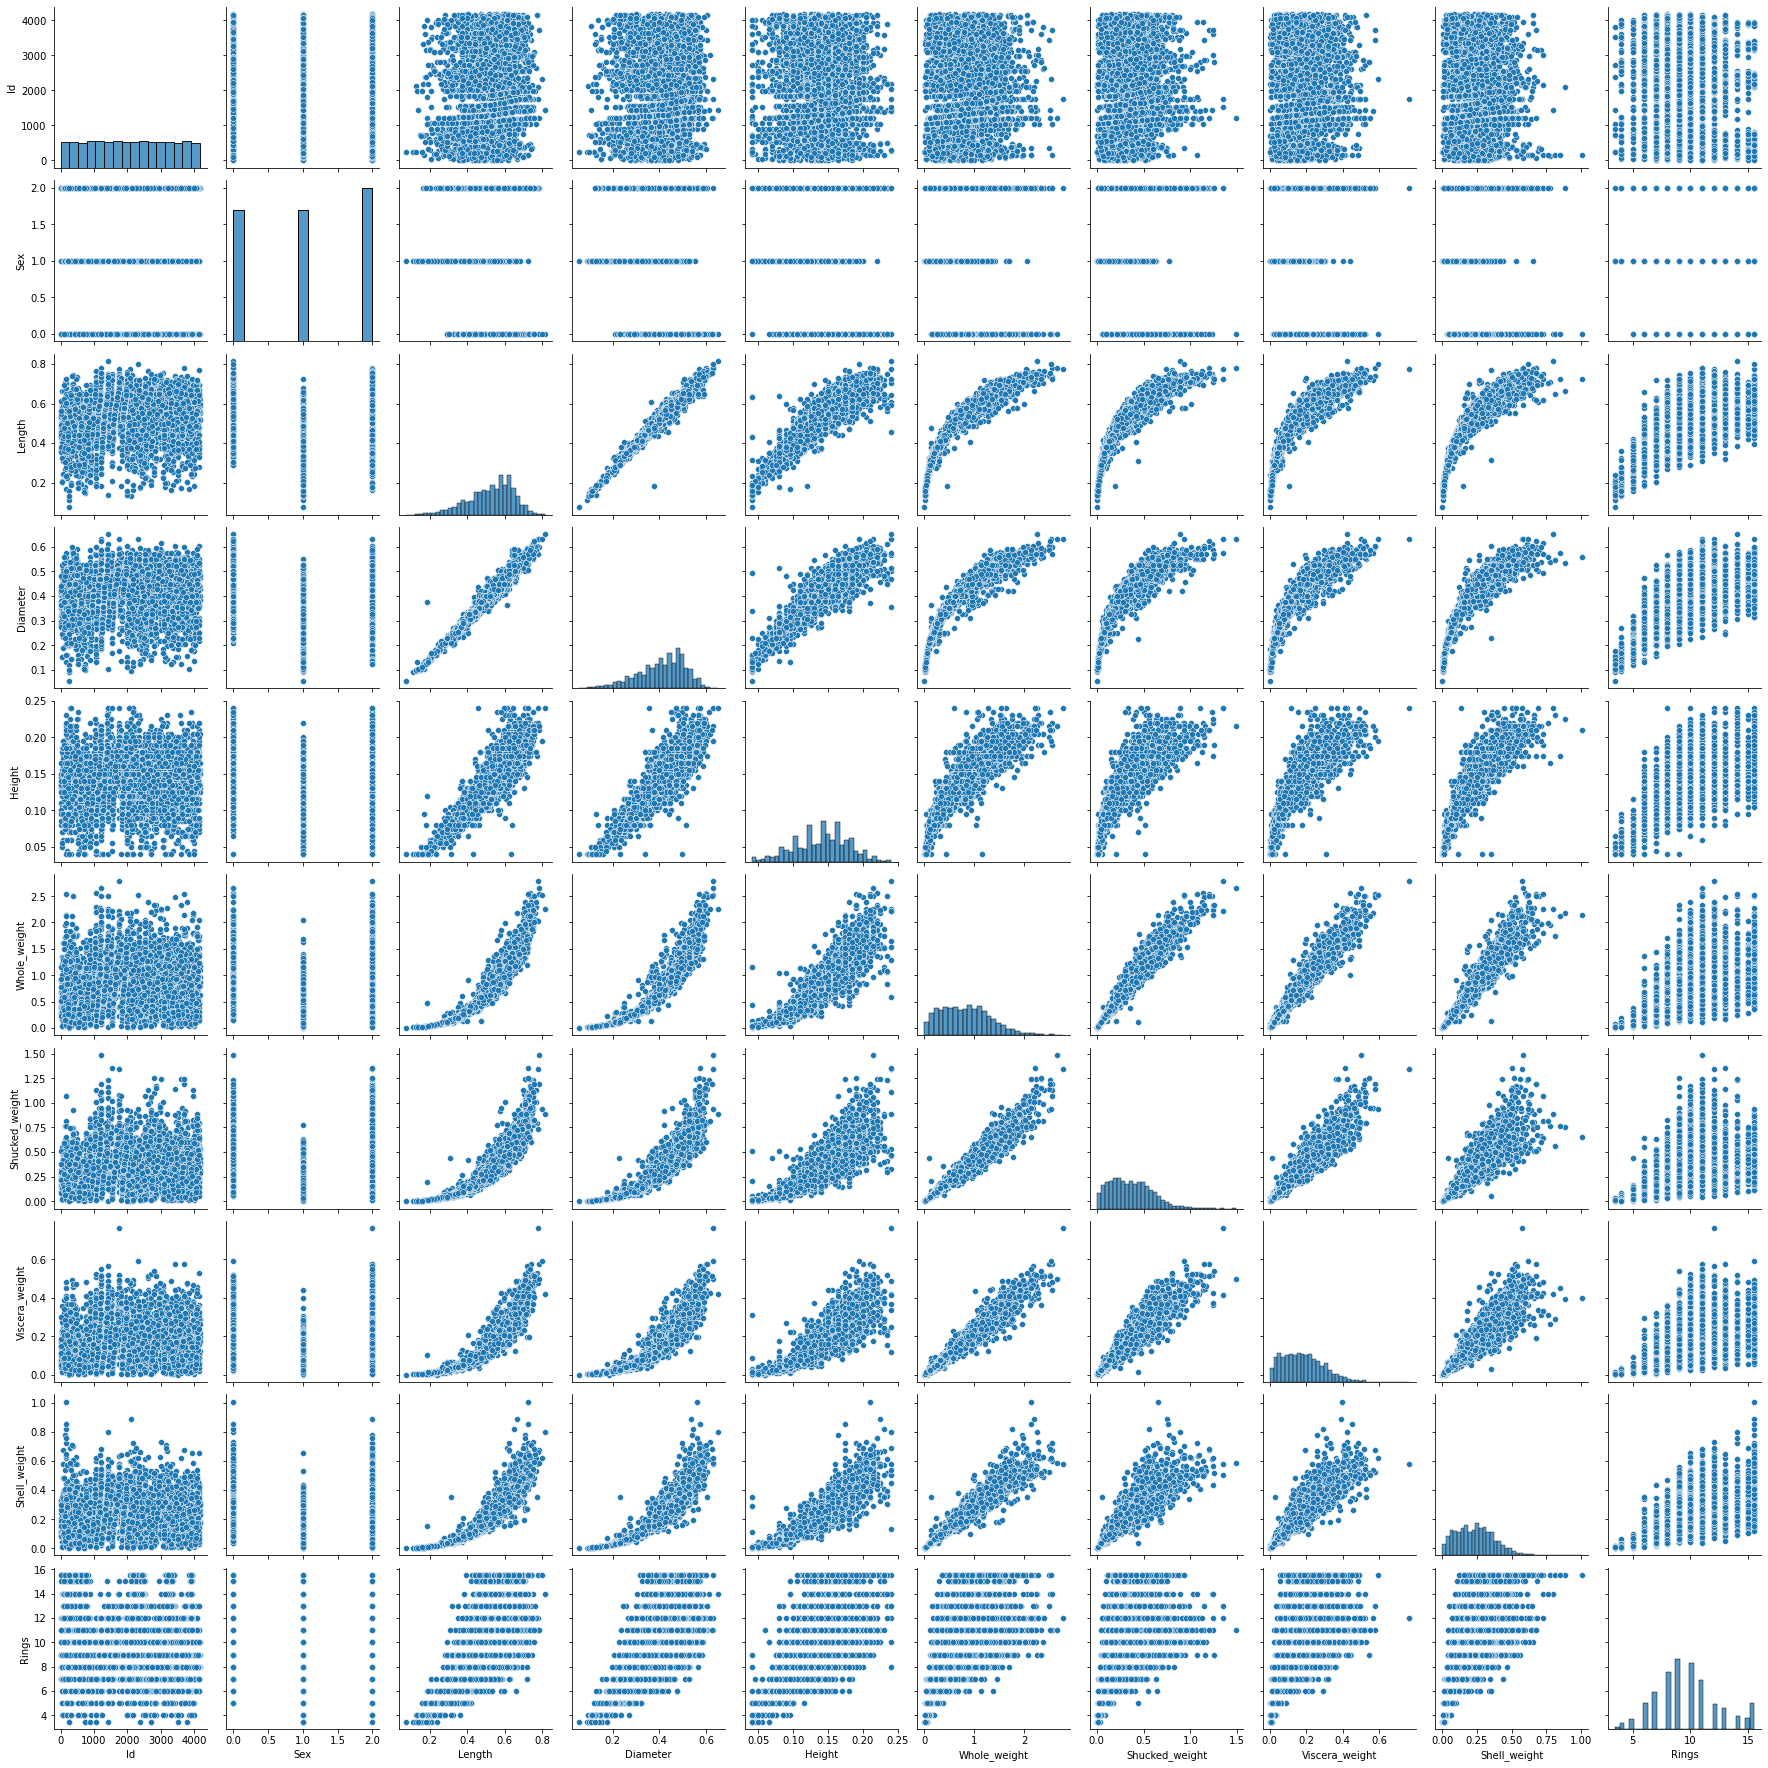

In [216]:
sns.pairplot(abalone_train)

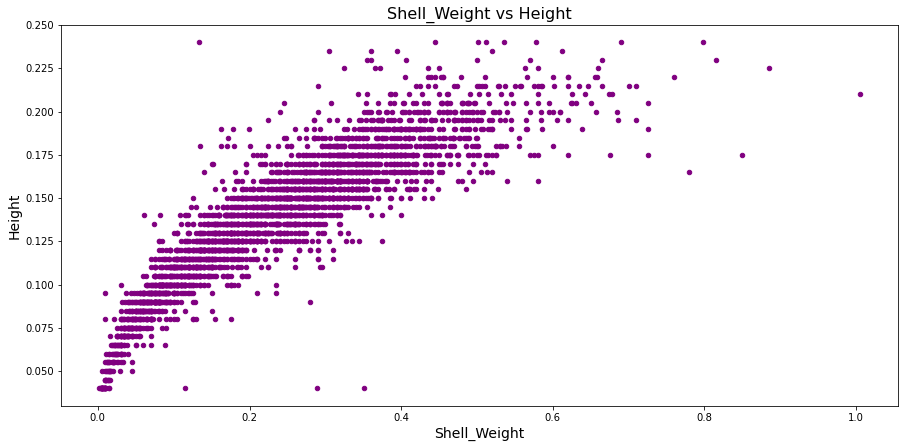

In [217]:
abalone_train.plot.scatter(x='Shell_weight', y='Height', color='purple', figsize=[15, 7])
plt.xlabel(xlabel='Shell_Weight', size=14)
plt.ylabel(ylabel='Height', size=14)
plt.title(label='Shell_Weight vs Height', size=16)
plt.show()

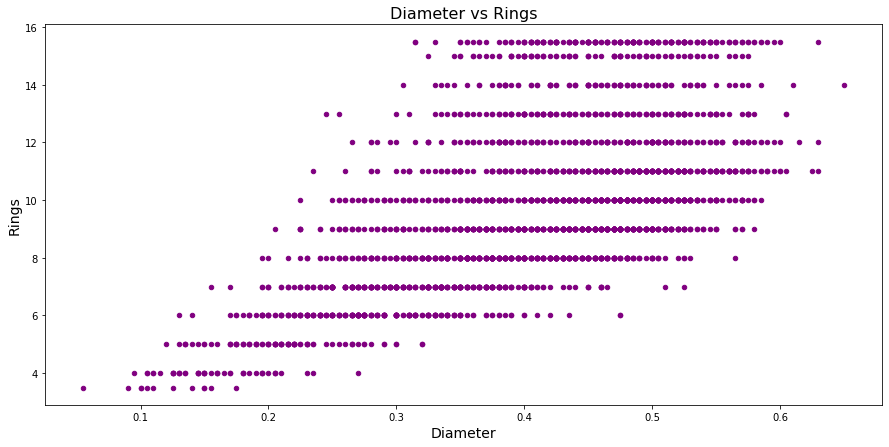

In [218]:
abalone_train.plot.scatter(x='Diameter', y='Rings', color='purple', figsize=[15, 7])
plt.xlabel(xlabel='Diameter', size=14)
plt.ylabel(ylabel='Rings', size=14)
plt.title(label='Diameter vs Rings', size=16)
plt.show()

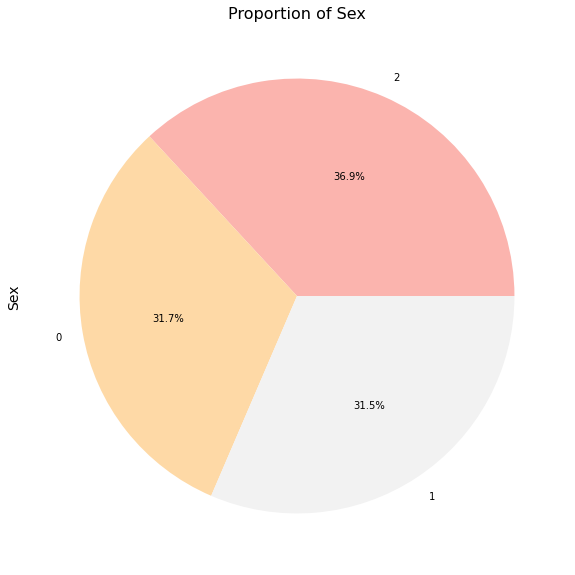

In [219]:
figure = plt.figure(figsize=[10, 10])

abalone_train['Sex'].value_counts().plot.pie(autopct='%3.1f%%',cmap = 'Pastel1')

plt.ylabel(ylabel='Sex', size=14)
plt.title(label='Proportion of Sex', size=16)
plt.show()

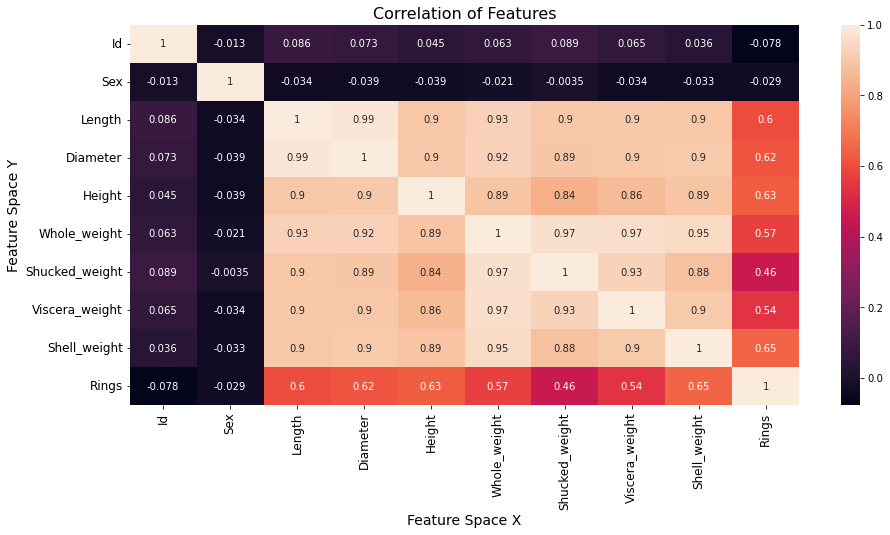

In [220]:
figure = plt.figure(figsize=[15, 7])
sns.heatmap(data=abalone_train.corr(), annot=True)
plt.xticks(size=12, rotation=90)
plt.yticks(size=12)
plt.xlabel(xlabel='Feature Space X', size=14)
plt.ylabel(ylabel='Feature Space Y', size=14)
plt.title(label='Correlation of Features', size=16)
plt.show()

<AxesSubplot:xlabel='Rings', ylabel='Density'>

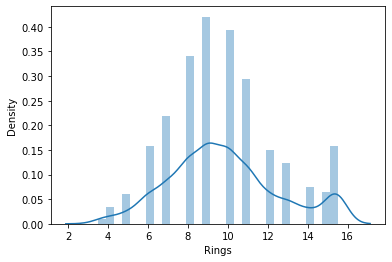

In [221]:
sns.distplot(abalone_train['Rings'])

<AxesSubplot:xlabel='Viscera_weight', ylabel='Density'>

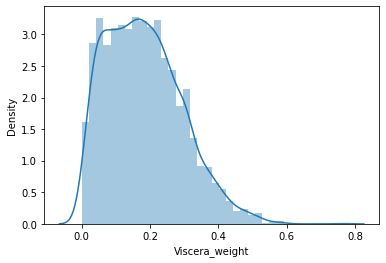

In [222]:
sns.distplot(abalone_train['Viscera_weight'])

<AxesSubplot:xlabel='Shell_weight', ylabel='Density'>

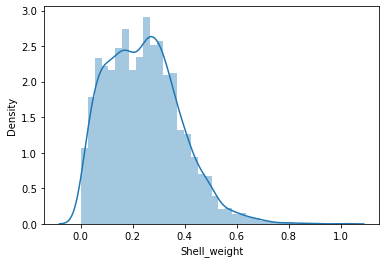

In [223]:
sns.distplot(abalone_train['Shell_weight'])

**Using LabelEncoder:**

In [257]:
from sklearn.preprocessing import LabelEncoder

In [258]:
le = LabelEncoder()

In [259]:
abalone_train['Sex'].unique()

array(['I', 'M', 'F'], dtype=object)

In [260]:
abalone_train['Sex'] = le.fit_transform(abalone_train['Sex'])

In [261]:
abalone_train.dtypes

Id                  int64
Sex                 int32
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
Rings               int64
dtype: object

In [262]:
abalone_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3341 entries, 0 to 3340
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              3341 non-null   int64  
 1   Sex             3341 non-null   int32  
 2   Length          3341 non-null   float64
 3   Diameter        3341 non-null   float64
 4   Height          3341 non-null   float64
 5   Whole_weight    3341 non-null   float64
 6   Shucked_weight  3341 non-null   float64
 7   Viscera_weight  3341 non-null   float64
 8   Shell_weight    3341 non-null   float64
 9   Rings           3341 non-null   int64  
dtypes: float64(7), int32(1), int64(2)
memory usage: 248.1 KB


**Train Test Split:**

In [263]:
x = abalone_train.iloc[:, 1:9]
y = abalone_train['Rings']

In [264]:
from sklearn.model_selection import train_test_split

In [265]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [266]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2672, 8)
(669, 8)
(2672,)
(669,)


# Random Forest Classifier

In [275]:
from sklearn.ensemble import RandomForestClassifier

In [276]:
model = RandomForestClassifier()

In [277]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [278]:
y_pred_test = model.predict(x_test)             #predicting on test data
y_pred_test

array([ 7,  8,  9,  8, 10, 12, 10,  8,  6, 11,  8, 11, 13,  8,  8, 11,  8,
        6,  9,  8,  9,  8, 10, 10, 10, 11,  7,  6, 11,  8,  9,  9,  9,  7,
       14, 10,  9, 10,  8, 14,  8,  9,  7,  8,  8,  7, 13,  9,  5,  9,  6,
       10, 10, 10,  8, 11,  5, 18, 10,  9,  6, 11, 10,  6, 11, 11,  8,  9,
       10,  8, 11,  9,  7,  7, 10, 10, 12, 12,  9,  6, 10,  8,  9,  7, 13,
        8, 10,  6,  9,  5, 10, 11,  6, 10, 10,  9, 10,  4, 10,  6,  9,  5,
       10, 10, 10, 11,  9, 10,  9, 10, 11, 11, 12,  7, 10, 13, 10,  7,  8,
        4,  7, 13,  6,  8,  6,  8,  5,  9, 11,  9, 10,  7,  8, 10,  8, 12,
        8,  9,  9, 14, 11,  8,  9, 11,  9, 13,  9, 10,  5,  7,  7, 10,  7,
       10, 11,  8,  9, 11,  9, 11,  9, 10,  9, 10,  7, 10, 16, 10, 10,  7,
       10,  6,  7,  7, 13,  6, 11,  9,  9, 10,  7,  5,  9, 11, 11,  6,  8,
       18,  6,  9,  9,  8,  9,  8, 13, 10, 11,  9,  7,  9,  7, 18, 11, 11,
       11, 10, 13, 10, 10, 11, 10, 10,  9,  8, 16,  8,  8, 10, 11, 11,  8,
        7, 17, 10,  6,  6

**Model Evaluation**

In [188]:
from sklearn.metrics import mean_squared_error

In [189]:
MSE = mean_squared_error(y_test, y_pred_test)

In [190]:
print('MSE for test set is {}'.format(MSE_test))

MSE for test set is 5.494768310911809


In [191]:
RMSE = np.sqrt(MSE)

In [192]:
print('RMSE for test set is {}'.format(RMSE))

RMSE for test set is 2.422181995707352


In [193]:
from sklearn.metrics import r2_score

In [194]:
R2= r2_score(y_test, y_pred_test)

In [195]:
print("R2 score for test set is {}".format(r2_test))

R2 score for test set is 0.5264651945721615


In [306]:
abalone_test.head()

,Id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,668,M,0.550,0.425,0.155,0.9175,0.2775,0.2430,0.3350
1,1580,I,0.500,0.400,0.120,0.6160,0.2610,0.1430,0.1935
2,3784,M,0.620,0.480,0.155,1.2555,0.5270,0.3740,0.3175
3,463,I,0.220,0.165,0.055,0.0545,0.0215,0.0120,0.0200
4,2615,M,0.645,0.500,0.175,1.5105,0.6735,0.3755,0.3775


In [307]:
abalone_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              836 non-null    int64  
 1   Sex             836 non-null    object 
 2   Length          836 non-null    float64
 3   Diameter        836 non-null    float64
 4   Height          836 non-null    float64
 5   Whole_weight    836 non-null    float64
 6   Shucked_weight  836 non-null    float64
 7   Viscera_weight  836 non-null    float64
 8   Shell_weight    836 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 58.9+ KB


In [308]:
abalone_test.skew()

Id               -0.006036
Length           -0.656208
Diameter         -0.611550
Height           -0.273292
Whole_weight      0.589928
Shucked_weight    0.707934
Viscera_weight    0.607108
Shell_weight      0.687698
dtype: float64

In [309]:
abalone_test.dtypes

Id                  int64
Sex                object
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
dtype: object

In [310]:
from sklearn.preprocessing import LabelEncoder

In [311]:
le = LabelEncoder()

In [312]:
abalone_test['Sex'] = le.fit_transform(abalone_test['Sex'])

In [313]:
abalone_test.dtypes

Id                  int64
Sex                 int32
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
dtype: object

In [314]:
df_test = abalone_test.iloc[:, 1:]

In [315]:
predicted_test = model.predict(df_test)

In [316]:
predicted_test

array([14,  9, 11,  4, 10, 13,  8,  8,  8,  9,  7,  5,  8,  9,  5,  8, 10,
       10, 11,  7,  7,  6,  9,  8,  9, 11,  4, 10,  9, 11,  9,  5, 10, 11,
        6,  8,  8,  9,  9, 10, 12, 11, 13, 10, 10,  9,  8, 12, 13,  8,  9,
        7,  8, 13,  8,  8,  6,  6,  6,  6, 10,  8, 10,  8,  7, 11, 11, 10,
        8, 11,  8, 14, 10,  8,  8,  9,  9, 10, 10,  8, 10,  5,  6, 12, 10,
        8,  9, 10,  4,  6,  9, 10,  8,  6, 14,  5,  9,  9, 14, 11,  9, 12,
       10,  9,  5, 11,  8,  7, 10, 10,  9, 10, 10,  9, 16, 11, 10, 13,  5,
        8,  6, 11,  6,  8, 10, 10,  9, 10,  7, 11, 10,  8,  8, 11, 11, 10,
        9,  8,  6, 10, 14, 12,  8,  9, 10,  9,  9,  8,  8,  6,  8, 10,  6,
        9,  6,  6,  9,  6, 10,  6, 10, 10, 10, 10,  5, 13,  7,  6, 11,  9,
        9,  4,  7, 10, 10, 11,  5,  8,  9, 13,  9,  9,  8,  8, 13, 10, 10,
        8,  7,  8, 10,  9,  8, 10, 10, 10,  7,  8,  4, 13,  9, 11, 12,  9,
       10, 10,  6, 10,  9, 13,  4, 10, 10,  9, 13, 10,  9, 10,  5, 11, 11,
       10,  8, 10, 10, 20

In [317]:
df_test['Rings_Pred'] = predicted_test

In [318]:
df_test.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings_Pred
0,2,0.550,0.425,0.155,0.9175,0.2775,0.2430,0.3350,14
1,1,0.500,0.400,0.120,0.6160,0.2610,0.1430,0.1935,9
2,2,0.620,0.480,0.155,1.2555,0.5270,0.3740,0.3175,11
3,1,0.220,0.165,0.055,0.0545,0.0215,0.0120,0.0200,4
4,2,0.645,0.500,0.175,1.5105,0.6735,0.3755,0.3775,10


In [319]:
df_test.to_csv('Submission_abalone_pred.csv', index = False, header = False)